1) Choose a classification database (eg wine, breast cancer, iris). O
Scikit-learn and the UCI Repository have some foundations. If any data is
categorical, transform to numeric.
2) Split the data into training/test using the hold-out technique. Choose one
percentage for training/testing (most used: 90/10, 80/20, 75/25, 70/30, 50/50).
3) Perform classification using KNN, using the Scikit-Learn library.
4) Calculate some metrics. Required: accuracy. Example of other metrics: recall,
precision, F1-Score. Use Scikit-Learn (classification_report, accuracy_score,
f1_score, etc)
5) Plot the confusion matrix.
6) Perform several experiments, modifying the number of neighbors (parameter
n_neighbors), and create a plot (k vs accuracy).
7) Discuss the results found.
8) Use the k-fold technique and discuss the results, comparing them with the hold-out technique.

## Importing Libraries

In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

## Dataframe Import

In [374]:
columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
df = pd.read_csv("Dataset\iris (1).data", header=None, names=columns)

## Transforming categories data in numerics

In [375]:
df["class"] = LabelEncoder().fit_transform(df["class"])

## Viewing data

In [376]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Fractioning dataframe

In [378]:
X = df.drop(columns='class')
X = X.to_numpy()

In [379]:
Y = df['class']
Y = Y.to_numpy()

## Separating into test and training

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, shuffle=True)

## Starting KNN Classifier

In [381]:
knn = KNeighborsClassifier().fit(X_train, y_train)
y_predict = knn.predict(X_test)

## Viewing Metrics

In [382]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.94      1.00      0.97        16

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38



## Plotting Confusion Matrix

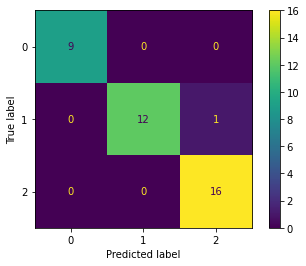

In [383]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

## Redoing the training

### As we will work with a dataset with about 150 elements it is interesting to redo the training with the scrambled data to visualize the assertiveness level of the algorithm and analyzing a set of tests, so I did the mean and standard deviation

In [384]:
accuracies = []
for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, shuffle=True)
    knn = KNeighborsClassifier().fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    accuracies.append(accuracy_score(y_predict,y_test))

print(f'Mean = {np.mean(accuracies)}')
print(f'Std = {np.std(accuracies)}')

Mean = 0.9647368421052633
Std = 0.025026301953618418


## Precision Graphic 

### The importance of viewing this graph is due to the reason to understand which is the best number of neighbors to put in the KNN hyperparameter

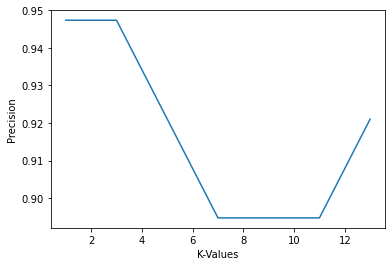

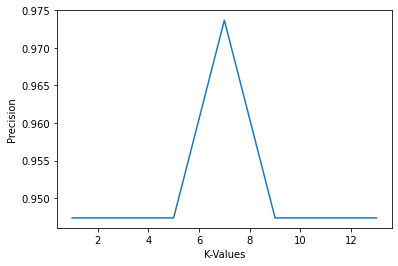

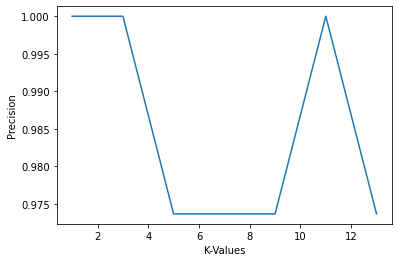

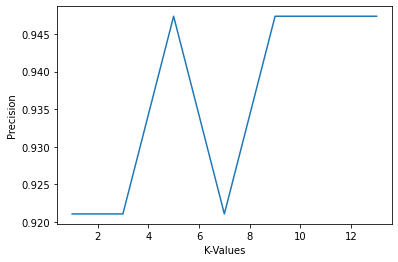

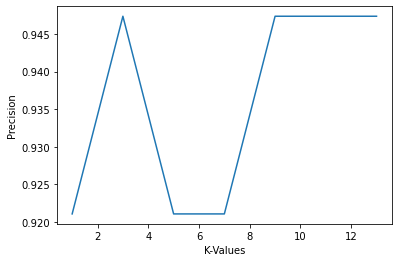

In [390]:
for k in range(5):
    k = []
    accuracy = []
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, shuffle=True)
    for i in range(1,15,2):
        k.append(i)
        model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
        y_predict = model.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_predict))
    fig, ax = plt.subplots()
    ax.plot(k, accuracy)
    ax.set(ylabel='Precision', xlabel='K-Values')
    plt.show()

If we look at the graphs we see that they vary a lot, so to find a common point for all, you can see that when n_neigbors gets 9 they have a similarity